### 1.Importing modules that interact with the database.

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
conn = psycopg2.connect("dbname=myduka user=postgres password=Candidcoco@20")

In [4]:
df = pd.read_sql_query("SELECT sales.id as sales_id, product_name, buying_price, selling_price, sales.quantity as sales_quantity, created_at as sales_created_at FROM products,sales WHERE products.id = sales.pid", conn)

### 2.Set column index

In [5]:
df.set_index('sales_id', inplace=True,verify_integrity=False)

### 3.Checking data types.

In [6]:
df.dtypes

product_name                object
buying_price                 int64
selling_price                int64
sales_quantity               int64
sales_created_at    datetime64[ns]
dtype: object

### 4. Creating new columns.

In [7]:
df['profit'] = df['selling_price'] - df['buying_price']

In [8]:
df.head(10)

,product_name,buying_price,selling_price,sales_quantity,sales_created_at,profit
sales_id,,,,,,
1,Vinegar - Tarragon,65,21,23,2022-11-13,-44
2,Cloves - Whole,33,75,12,2022-08-31,42
3,"Pail - 15l White, With Handle",47,10,92,2022-12-29,-37
4,"Chocolate - Pistoles, Lactee, Milk",75,37,17,2023-04-08,-38
5,Cassis,16,82,100,2023-05-25,66
6,Sage Derby,11,18,85,2023-04-16,7
7,Nantucket - Pomegranate Pear,53,25,58,2022-08-25,-28
8,Carbonated Water - Raspberry,84,11,87,2023-03-05,-73
9,Milkettes - 2%,25,32,35,2023-01-12,7


In [9]:
df['new_selling_price'] = df['buying_price'] * 0.25

In [10]:
# Update the existing new_selling_price column to be 10 times the current values
df['new_selling_price'] = df['new_selling_price'] * 10

In [11]:
df['new_profit'] = df['new_selling_price'] - df['buying_price'] 

In [12]:
df.head(10)

,product_name,buying_price,selling_price,sales_quantity,sales_created_at,profit,new_selling_price,new_profit
sales_id,,,,,,,,
1,Vinegar - Tarragon,65,21,23,2022-11-13,-44,162.5,97.5
2,Cloves - Whole,33,75,12,2022-08-31,42,82.5,49.5
3,"Pail - 15l White, With Handle",47,10,92,2022-12-29,-37,117.5,70.5
4,"Chocolate - Pistoles, Lactee, Milk",75,37,17,2023-04-08,-38,187.5,112.5
5,Cassis,16,82,100,2023-05-25,66,40.0,24.0
6,Sage Derby,11,18,85,2023-04-16,7,27.5,16.5
7,Nantucket - Pomegranate Pear,53,25,58,2022-08-25,-28,132.5,79.5
8,Carbonated Water - Raspberry,84,11,87,2023-03-05,-73,210.0,126.0
9,Milkettes - 2%,25,32,35,2023-01-12,7,62.5,37.5


In [13]:
sales = df['new_profit'] + df['buying_price']

In [14]:
sales.sum()

5587.5

### 5. Filter for items with positive profitability and then get top 5 by sales

In [15]:
# Sort the DataFrame by Profit in descending order and then by Buying_Price in ascending order
df = df.sort_values(by=['profit', 'buying_price'], ascending=[False, True])

# Display the top five sales
top_products = df.head(5)

In [16]:
top_products

,product_name,buying_price,selling_price,sales_quantity,sales_created_at,profit,new_selling_price,new_profit
sales_id,,,,,,,,
38,Mushroom - Portebello,5,76,75,2023-01-17,71,12.5,7.5
27,"Bread - Rolls, Rye",6,72,87,2023-07-21,66,15.0,9.0
5,Cassis,16,82,100,2023-05-25,66,40.0,24.0
48,Wine La Vielle Ferme Cote Du,36,94,90,2023-03-31,58,90.0,54.0
21,Creme De Menthe Green,42,100,76,2022-12-30,58,105.0,63.0


### 6. Find the month with the highest total sales

In [17]:
# Convert the 'created_at' column to a datetime format
df['sales_created_at'] = pd.to_datetime(df['sales_created_at'])

# Calculate the sales for each row on the fly (new_selling_price - Buying_Price)
df['Sales'] = df['new_selling_price'] - df['buying_price']

# Extract the month from the 'created_at' column and add it to the original DataFrame
df['Month'] = df['sales_created_at'].dt.to_period('M')

# Find the month with the highest total sales
best_month = df.groupby('Month')['Sales'].sum().idxmax()

In [18]:
best_month

Period('2023-07', 'M')

### 7. Create the plot using Pandas' plotting function

Text(0.5, 1.0, 'Total Sales per Product')

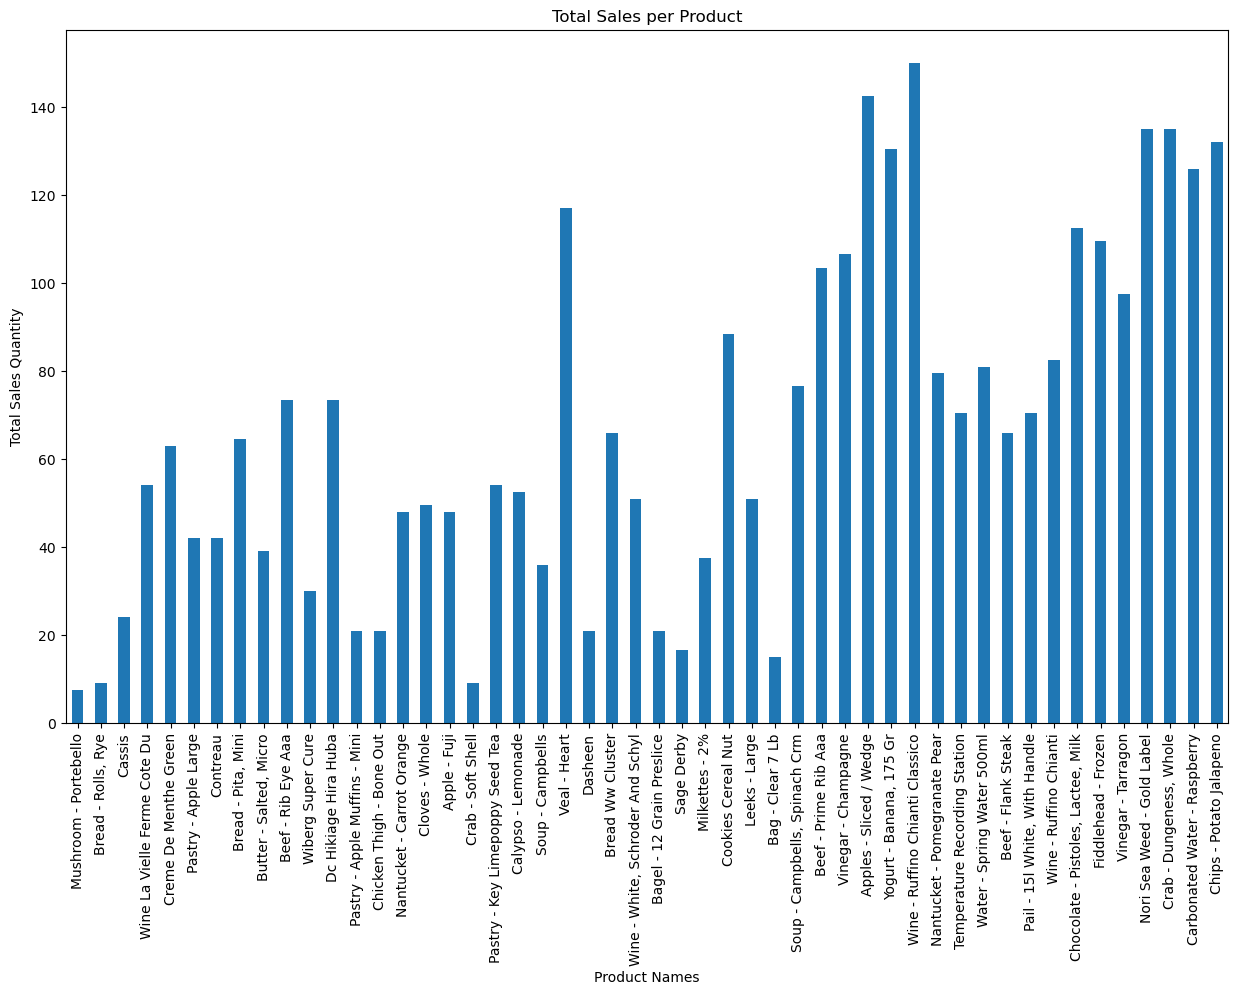

In [19]:
df.plot.bar('product_name','Sales',legend=False,rot=90,figsize=(15,9))
plt.xlabel('Product Names')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales per Product')

In [20]:
# Calculate the average profit for each product name --- correlation between product name and profit
df.groupby('product_name')['new_profit'].mean()

product_name
Apple - Fuji                           48.0
Apples - Sliced / Wedge               142.5
Bag - Clear 7 Lb                       15.0
Bagel - 12 Grain Preslice              21.0
Beef - Flank Steak                     66.0
Beef - Prime Rib Aaa                  103.5
Beef - Rib Eye Aaa                     73.5
Bread - Pita, Mini                     64.5
Bread - Rolls, Rye                      9.0
Bread Ww Cluster                       66.0
Butter - Salted, Micro                 39.0
Calypso - Lemonade                     52.5
Carbonated Water - Raspberry          126.0
Cassis                                 24.0
Chicken Thigh - Bone Out               21.0
Chips - Potato Jalapeno               132.0
Chocolate - Pistoles, Lactee, Milk    112.5
Cloves - Whole                         49.5
Contreau                               42.0
Cookies Cereal Nut                     88.5
Crab - Dungeness, Whole               135.0
Crab - Soft Shell                       9.0
Creme De Menthe Gre

Text(0.5, 1.0, 'Total Sales per Month')

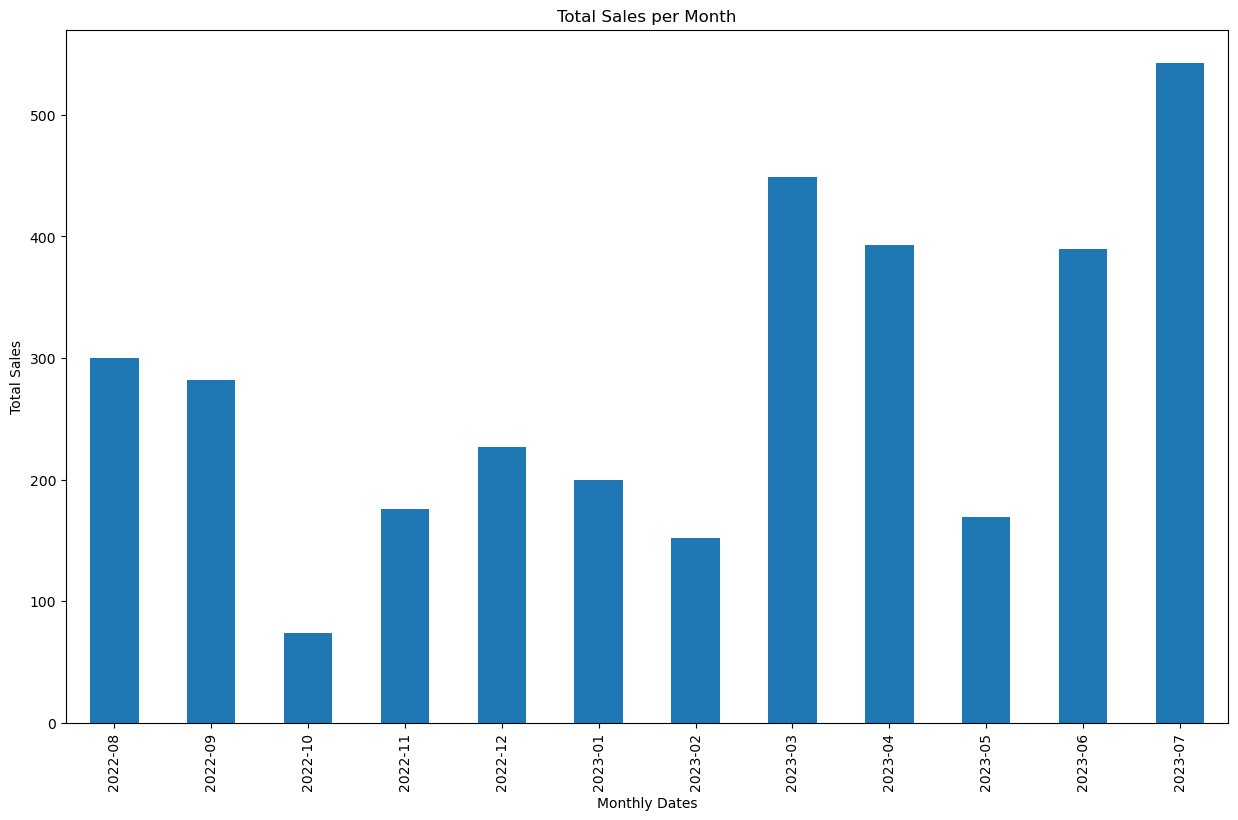

In [21]:
# Group by the month extracted from the 'Date' column and sum the 'Sales' within each group
grouped_df = df.groupby(df['sales_created_at'].dt.to_period('M'))['Sales'].sum()

# Create a bar plot
grouped_df.plot(kind='bar', rot=90, figsize=(15,9)) 
plt.xlabel('Monthly Dates')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')

### 8.Cleaning up columns to follow programming naming.

In [22]:
df.columns.to_list()

['product_name',
 'buying_price',
 'selling_price',
 'sales_quantity',
 'sales_created_at',
 'profit',
 'new_selling_price',
 'new_profit',
 'Sales',
 'Month']

In [23]:
df.columns = df.columns.str.lower()

In [24]:
df.columns

Index(['product_name', 'buying_price', 'selling_price', 'sales_quantity',
       'sales_created_at', 'profit', 'new_selling_price', 'new_profit',
       'sales', 'month'],
      dtype='object')

### 9.Removing duplicates

In [25]:
df.shape

(50, 10)

In [26]:
new_df = df.append(df)
new_df.shape

(100, 10)

In [27]:
new_df = df.drop_duplicates()
new_df.shape

(50, 10)

### 10.Cleaning up unused columns.

In [28]:
columns_to_drop = ['selling_price', 'profit']
df.drop(columns=columns_to_drop, inplace=True)

### 11.Dealing with null values.

In [29]:
df.isnull().sum()

product_name         0
buying_price         0
sales_quantity       0
sales_created_at     0
new_selling_price    0
new_profit           0
sales                0
month                0
dtype: int64

### 12.Summary statistics.

In [30]:
df.corr()

,buying_price,sales_quantity,new_selling_price,new_profit,sales
buying_price,1.00000,0.07264,1.00000,1.00000,1.00000
sales_quantity,0.07264,1.00000,0.07264,0.07264,0.07264
new_selling_price,1.00000,0.07264,1.00000,1.00000,1.00000
new_profit,1.00000,0.07264,1.00000,1.00000,1.00000
sales,1.00000,0.07264,1.00000,1.00000,1.00000


In [31]:
df['buying_price'].corr(df['new_profit']) #pearson correlation

1.0

In [32]:
# Calculate Spearman's rank correlation coefficient
spearman_corr = df['buying_price'].corr(df['new_profit'], method='spearman')

In [33]:
spearman_corr

1.0

In [34]:
file_path = 'C:/Users/USER/OneDrive/Documents/datascience/csv files/duka_sales_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [35]:
# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/USER/OneDrive/Documents/datascience/csv files/duka_sales_cleaned.csv')

# Display the first few rows of the DataFrame
df.head(5)

,product_name,buying_price,sales_quantity,sales_created_at,new_selling_price,new_profit,sales,month
0,Mushroom - Portebello,5,75,2023-01-17,12.5,7.5,7.5,2023-01
1,"Bread - Rolls, Rye",6,87,2023-07-21,15.0,9.0,9.0,2023-07
2,Cassis,16,100,2023-05-25,40.0,24.0,24.0,2023-05
3,Wine La Vielle Ferme Cote Du,36,90,2023-03-31,90.0,54.0,54.0,2023-03
4,Creme De Menthe Green,42,76,2022-12-30,105.0,63.0,63.0,2022-12
